In [1]:
import sys
sys.path.append('../modules')

from operators import *
from preprocessing import *
from eof import *
from gridding import *
from mapper import *
from scipy.stats import linregress

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature
import seaborn as sns
import pandas as pd

%load_ext autoreload
%autoreload 2

## Snowload
---
Load data and interpolate the design value field

In [2]:
PATH = '/storage/data/projects/nrc/CanRCM4_large_ensemble/design_values/snw/snw_CanRCM4-LE_ens35_1951-2016_max_rl50_load.nc'
mask_path = '/home/nannau/Desktop/climpyrical/data/mask.nc'
dv = 'snw'

interp_dict = get_interpolation(mask_path, PATH, dv)
master_idx = interp_dict['idx']
iens = (interp_dict['iens'][:, master_idx])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=False, copy=True)
iens = scaler.fit_transform(iens)

Perform singular value decomposition

In [3]:
u, s, vT = np.linalg.svd(iens, full_matrices=False)
explained_variance_ratio = [s[i]/np.sum(s) for i in range(s.shape[0])]

del u
vT.shape

(35, 799963)

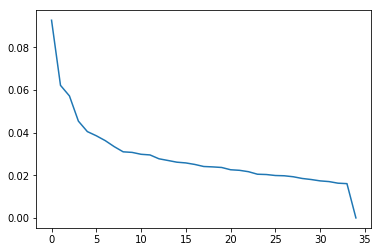

In [5]:
plt.plot(range(s.shape[0]), explained_variance_ratio)

Transform back into the spatial representation

In [ ]:
iens_copy = np.empty((interp_dict['iens'].shape))
iens_copy[...] = np.nan
iens_copy[:, master_idx] = vT
X = np.reshape(iens_copy, (iens_copy.shape[0], interp_dict['irlat'].shape[0], interp_dict['irlon'].shape[0]))

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
x, y = interp_dict['irlon'], interp_dict['irlat']
eof1 = axes[0, 0].imshow(X[0, ...], origin='lower', cmap=plt.cm.get_cmap('RdBu', 12), label='EOF', vmin=-.0025, vmax=0.0025, extent=[x.min(), x.max(), y.min(), y.max()])
axes[0, 0].set_title('EOF 1: {0:.4f}%'.format(explained_variance_ratio[0]))
axes[1, 0].imshow(X[1, ...], origin='lower', cmap=plt.cm.get_cmap('RdBu', 12), label='EOF', vmin=-.0025, vmax=0.0025, extent=[x.min(), x.max(), y.min(), y.max()])
axes[1, 0].set_title('EOF 2: {0:.4f}%'.format(explained_variance_ratio[1]))
axes[0, 1].imshow(X[2, ...], origin='lower', cmap=plt.cm.get_cmap('RdBu', 12), label='EOF', vmin=-.0025, vmax=0.0025, extent=[x.min(), x.max(), y.min(), y.max()])
axes[0, 1].set_title('EOF 3: {0:.4f}%'.format(explained_variance_ratio[2]))
axes[1, 1].imshow(X[3, ...], origin='lower', cmap=plt.cm.get_cmap('RdBu', 12), label='EOF', vmin=-.0025, vmax=0.0025, extent=[x.min(), x.max(), y.min(), y.max()])
axes[1, 1].set_title('EOF 4: {0:.4f}%'.format(explained_variance_ratio[3]))
# plt.tight_layout(pad=2, w_pad=0.5, h_pad=1.0)
plt.colorbar(eof1, ax=axes.ravel().tolist(), orientation='horizontal')
# plt.set_xlim(x.min(), x.max())